## Import the relevant libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [18]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [25]:
training_data = np.load('TF_intro.npz')

In [26]:
input_size = 2

output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='huber_loss')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 11.4768
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1936
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3891
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7385
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1419
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5653
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0252
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5751
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3303
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1898
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 13/100
32/32 [================

## Extract the weights and bias


In [27]:
model.layers[0].get_weights()

[array([[ 2.0203  ],
        [-3.045583]], dtype=float32),
 array([4.99706], dtype=float32)]

In [28]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0203  ],
       [-3.045583]], dtype=float32)

In [29]:
bias = model.layers[0].get_weights()[1]
bias

array([4.99706], dtype=float32)

## Extract the outputs (make predictions)
Once more, this is not an essential step, however, we usually want to be able to make predictions.

In [30]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  9.6],
       [ 34.7],
       [  8.1],
       [ 18.3],
       [ 16.9],
       [-10.7],
       [-22.1],
       [ 10.3],
       [ 16.3],
       [  1.3],
       [-21.1],
       [ 16. ],
       [ -7.4],
       [  2.1],
       [ 13. ],
       [ 10.6],
       [ 23.8],
       [ 16.2],
       [-27.6],
       [ 42.5],
       [  0.3],
       [ 35.8],
       [  6.5],
       [-20.7],
       [ 12.1],
       [ 19.7],
       [  3.1],
       [  5.8],
       [-18.4],
       [-30.5],
       [ 19.1],
       [-14.1],
       [-27.9],
       [ 12.5],
       [ 29.8],
       [-28.1],
       [ 30.7],
       [ 19.2],
       [ 30.1],
       [  7.2],
       [-14. ],
       [  3.9],
       [  5.6],
       [ 21.9],
       [  1.8],
       [ -1.5],
       [-15.9],
       [ -3.5],
       [-35. ],
       [-34.5],
       [-17.4],
       [ -4.2],
       [ 24.7],
       [ 31.1],
       [ 29.8],
       [  0.8],
       [-11.9],
       [ -0. ],
       [  4.4],
       [ -9. ],
       [ 41.5],
       [  9.4],
       [

In [31]:
training_data['targets'].round(1)

array([[ 10. ],
       [ 35. ],
       [  7.6],
       [ 18.4],
       [ 15.8],
       [ -9.6],
       [-22.3],
       [ 10. ],
       [ 15.8],
       [  1. ],
       [-19.8],
       [ 15.9],
       [ -7.8],
       [  2.5],
       [ 12.3],
       [ 10.7],
       [ 23.7],
       [ 15.3],
       [-27.2],
       [ 41.6],
       [  0.4],
       [ 35.2],
       [  6.3],
       [-20.6],
       [ 12.2],
       [ 20.3],
       [  2.8],
       [  5.1],
       [-17.3],
       [-29.4],
       [ 19.6],
       [-14. ],
       [-27.6],
       [ 11.7],
       [ 28.7],
       [-27.4],
       [ 30.6],
       [ 18.7],
       [ 29.3],
       [  6.9],
       [-14.2],
       [  4.4],
       [  6.4],
       [ 21.2],
       [  2.3],
       [ -2.3],
       [-15.8],
       [ -4.2],
       [-35. ],
       [-33.2],
       [-16.9],
       [ -4.1],
       [ 23.6],
       [ 31. ],
       [ 30.4],
       [  0.5],
       [-11. ],
       [  0.6],
       [  3.7],
       [ -8.4],
       [ 40.4],
       [ 10.1],
       [

## Plotting the data

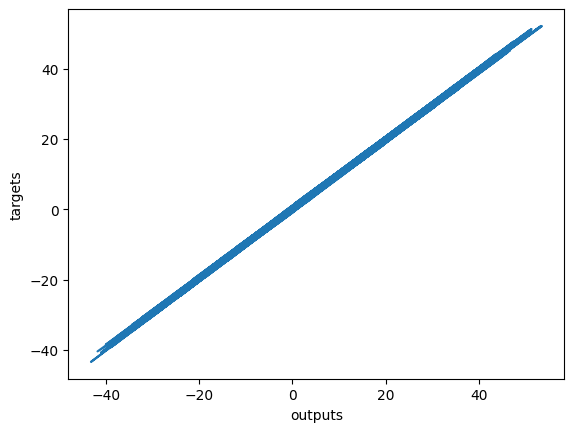

In [33]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()